In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("boston.csv")

Os dados contêm as seguintes colunas:

- **`crim`**: taxa de criminalidade per capita por cidade.  
- **`zn`**: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés².  
- **`indus`**: proporção de acres com negócios não varejistas por cidade.  
- **`chas`**: variável indicadora do Rio Charles (= 1 se o setor faz fronteira com o rio; 0 caso contrário).  
- **`nox`**: concentração de óxidos de nitrogênio (partes por 10 milhões).  
- **`rm`**: número médio de cômodos por residência.  
- **`age`**: proporção de unidades ocupadas pelos proprietários construídas antes de 1940.  
- **`dis`**: média ponderada das distâncias até cinco centros de emprego em Boston.  
- **`rad`**: índice de acessibilidade a rodovias radiais.  
- **`tax`**: taxa de imposto sobre propriedade com valor total por $10.000.  
- **`ptratio`**: razão aluno-professor por cidade.  
- **`lstat`**: percentual da população de menor status socioeconômico.
- **`unkn`**: uma variável desconhecida que pode ou não ser útil para o modelo.
- **`medv`**: valor mediano das residências ocupadas por proprietários (em milhares de dólares).


Seu objetivo é utilizar as técnicas vistas em sala para aprender uma função para prever **medv**

In [16]:
# Imports necessários
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme()

Abaixo deixo alguns códigos que talvez sejam úteis

In [8]:
# 1. Carregar os dados
# Se estiver usando o sklearn, use datasets.load_boston() (deprecated) ou outro carregamento adequado.
# Você pode carregar de um arquivo CSV, por exemplo.

# Exemplo com seaborn (Boston antigo): 
boston = pd.read_csv("boston.csv", index_col=0)  # caso tenha acesso
X = boston[[i for i in boston.columns if i not in ['medv', 'unkw']]]  # variáveis explicativas (ex: número de cômodos)
Y = boston['medv']  # variável alvo

print(boston.shape)
print(X.columns)

(506, 14)
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'unkw'],
      dtype='object')


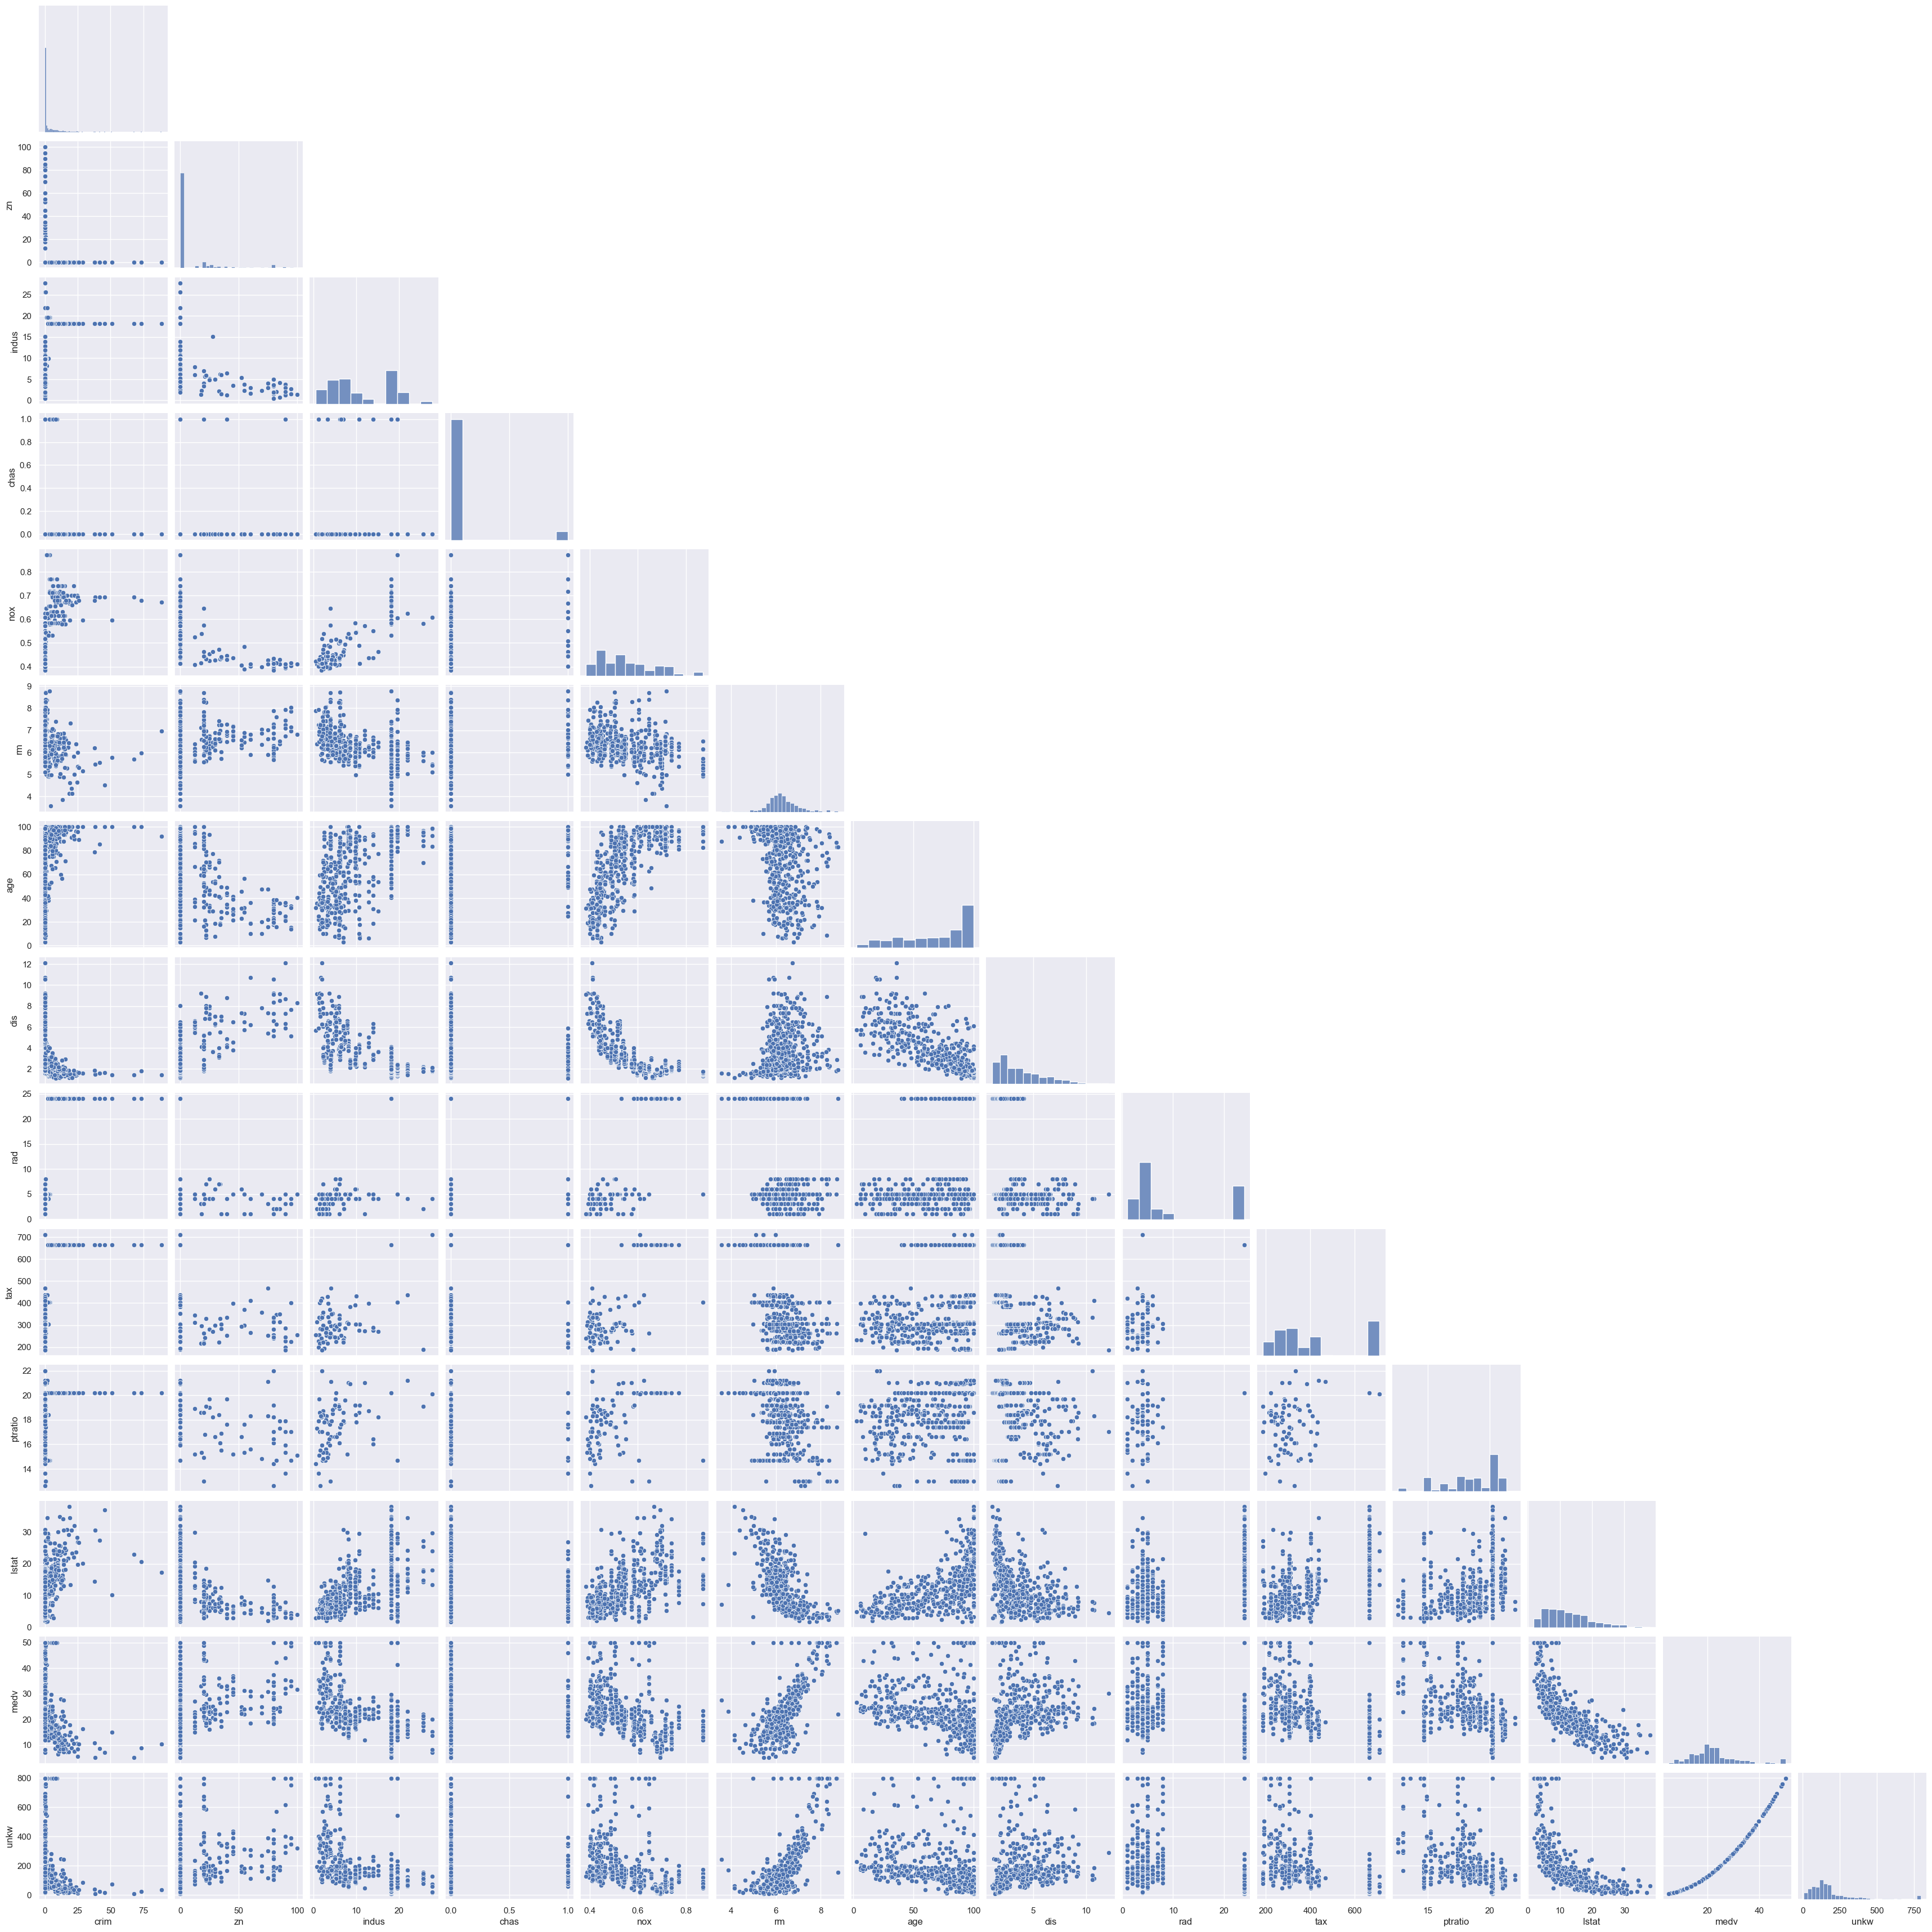

In [12]:
# 2. Visualizar os dados
# Use scatterplot para ver a relação entre X e Y
# Ex: sns.scatterplot(x=X[...], y=Y)

sns.pairplot(boston, corner=True)

In [14]:
# 3. Separar os dados em treino e teste
# Use train_test_split para dividir os dados em treino e teste
# Ex: X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# 4. Ajustar modelo de regressão linear
# Criar e ajustar um modelo LinearRegression com os dados de treino
# Ex: modelo = LinearRegression()
#     modelo.fit(X_train, Y_train)

modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [18]:
# 5. Fazer previsões e avaliar o modelo
# Usar o modelo para prever os dados de teste e calcular métricas como R² e RMSE
Y_pred = modelo.predict(X_test)
print(r2_score(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))


0.9755646444317494
1.7919370666874768


In [20]:
# 6. Repetir os passos com regressão polinomial
# Criar PolynomialFeatures com grau 2 ou 3, transformar X, e ajustar o LinearRegression
# Ex:

from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, Y_train)

Y_pred = poly_model.predict(X_test)
print(r2_score(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))

0.9931003043911093
0.5059807816546195


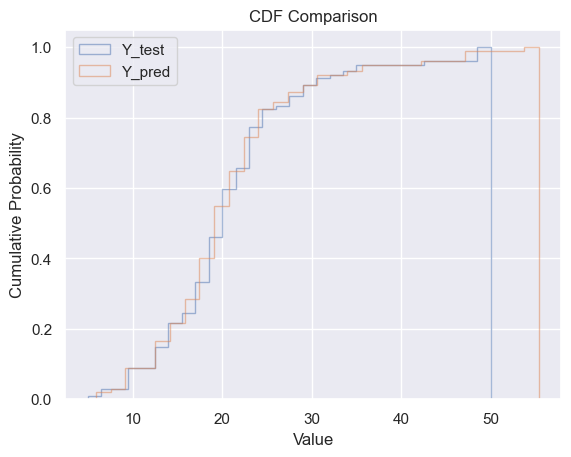

In [23]:
# 7. Visualizar os resultados da regressão polinomial
# Gerar curva de predição para comparar com os dados reais
# Plotar os pontos reais e a curva ajustada pelo modelo

plt.hist(Y_test, bins=30, density=True, cumulative=True, alpha=0.5, label='Y_test', histtype='step')
plt.hist(Y_pred, bins=30, density=True, cumulative=True, alpha=0.5, label='Y_pred', histtype='step')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('CDF Comparison')
plt.legend()

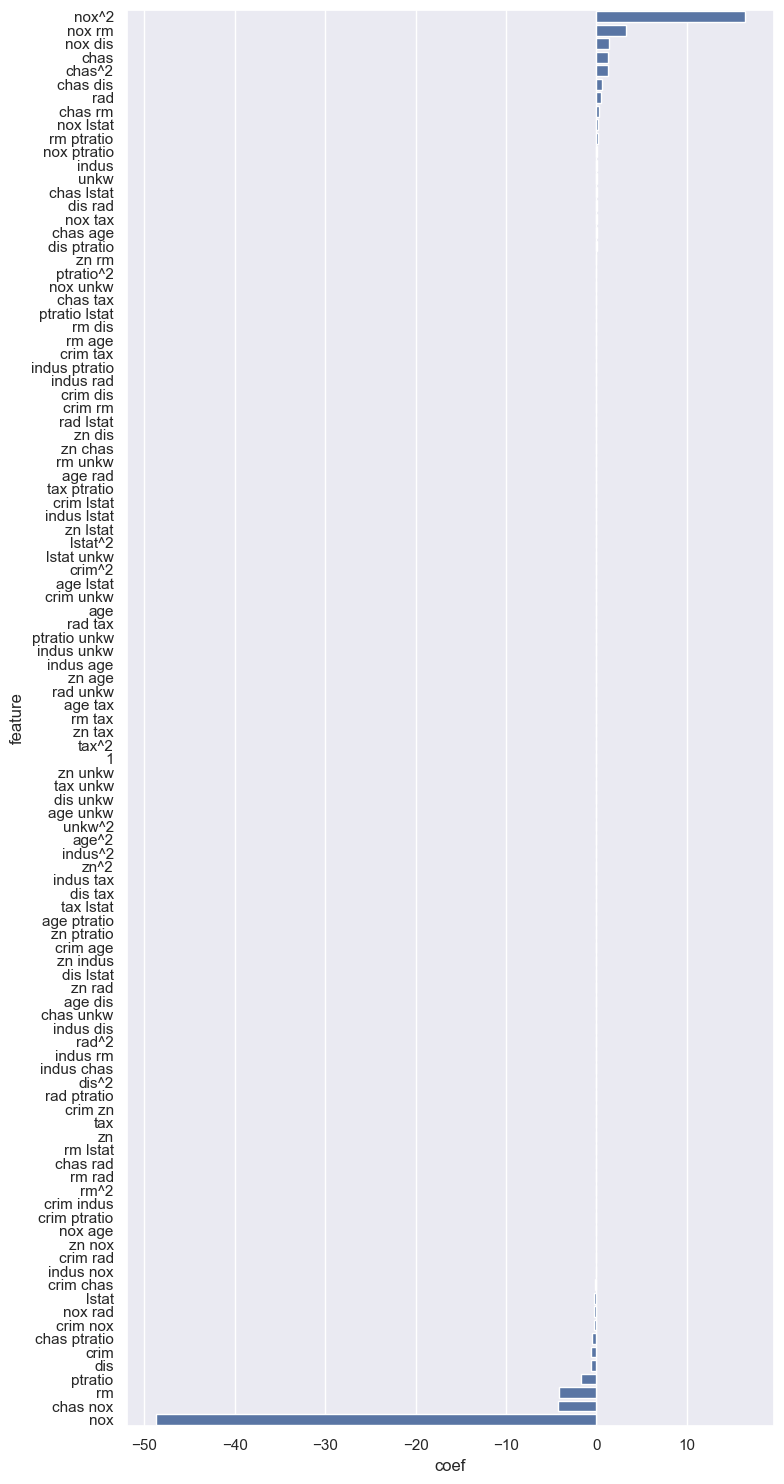

In [39]:
# 8. Visualizar os coeficientes do modelo
# Após treinar o modelo (modelo.fit), você pode acessar modelo.coef_ para ver os coeficientes
# Ex:
# coeficientes = poly_model.coef_
# nomes = X.columns  # ou uma lista manual, como ['rm']

features = poly_model.named_steps['polynomialfeatures'].get_feature_names_out()
coefs = poly_model.named_steps['linearregression'].coef_

plot_df = pd.DataFrame({'feature': features, 'coef': coefs}).set_index('feature').sort_values('coef', ascending=False)

fig, ax = plt.subplots(figsize=(8, 15))
sns.barplot(x='coef', y=plot_df.index, data=plot_df)
fig.tight_layout()